# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import Lasso, Ridge

In [2]:
data = loadmat('05HW1_diabetes.mat')
x_train, y_train = data['x_train'], data['y_train']
x_train.shape, y_train.shape

((242, 64), (242, 1))

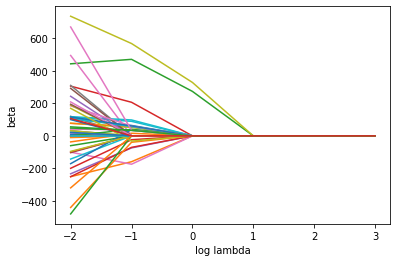

In [3]:
alphas = list(range(-2, 4))
betas = []
for alpha in [10 ** a for a in alphas]:
    lasso = Lasso(alpha=alpha).fit(x_train, y_train)
    betas.append(lasso.coef_)
    
plt.plot(alphas, betas)
plt.xlabel('log lambda')
plt.ylabel('beta')
plt.show()

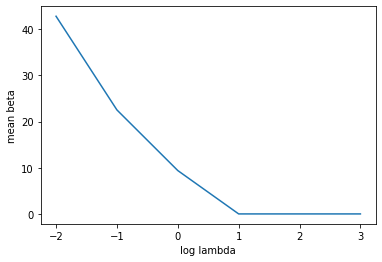

In [4]:
alphas = list(range(-2, 4))
betas = []
for alpha in [10 ** a for a in alphas]:
    lasso = Lasso(alpha=alpha).fit(x_train, y_train)
    betas.append(lasso.coef_.mean())
    
plt.plot(alphas, betas)
plt.xlabel('log lambda')
plt.ylabel('mean beta')
plt.show()

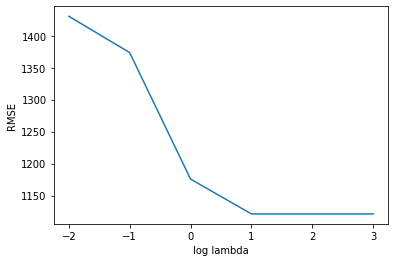

In [24]:
x_test, y_test = data['x_test'], data['y_test']
alphas = list(range(-2, 4))
betas = []
errors = []
for alpha in [10 ** a for a in alphas]:
    lasso = Lasso(alpha=alpha).fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    errors.append(((((y_pred - y_test) ** 2).sum())/y_test.shape[0])**0.5)
    
plt.plot(alphas, errors)
plt.xlabel('log lambda')
plt.ylabel('RMSE')
plt.show()

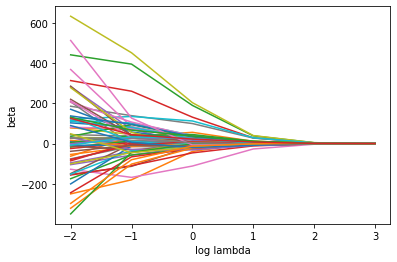

In [15]:
alphas = list(range(-2, 4))
betas = []
for alpha in [10 ** a for a in alphas]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    betas.append(ridge.coef_.squeeze(0))
    
plt.plot(alphas, betas)
plt.xlabel('log lambda')
plt.ylabel('beta')
plt.show()

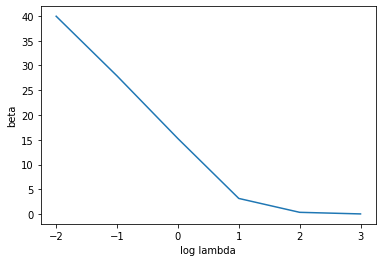

In [16]:
alphas = list(range(-2, 4))
betas = []
for alpha in [10 ** a for a in alphas]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    betas.append(ridge.coef_.squeeze(0).mean())
    
plt.plot(alphas, betas)
plt.xlabel('log lambda')
plt.ylabel('beta')
plt.show()

# Problem 2

In [21]:
wine_training = np.loadtxt('05HW2_wine_training.txt')
wine_training.shape
train_x, train_y = wine_training[:, :11], wine_training[:, 11]

In [35]:
wine_testing = np.loadtxt('05HW2_wine_test.txt')
test_x, test_y = wine_testing[:, :11], wine_testing[:, 11]

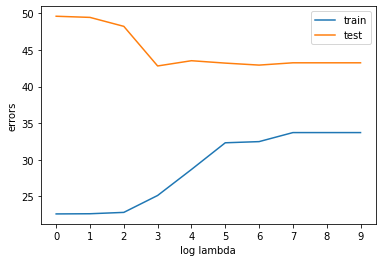

In [38]:
alphas = list(range(10))
train_errors = []
test_errors = []
for alpha in [0.0001 * (5 ** a) for a in alphas]:
    lasso = Lasso(alpha=alpha).fit(train_x, train_y)
    pred_train_y = lasso.predict(train_x)
    train_errors.append(((((pred_train_y - train_y) ** 2).sum())))
    pred_y = lasso.predict(test_x)
    test_errors.append(((((pred_y - test_y) ** 2).sum())))

fig, ax = plt.subplots()
plt.plot(alphas, train_errors, label='train')
plt.plot(alphas, test_errors, label='test')
plt.xlabel('log lambda')
ax.set_xticks(list(range(0, 10)))
plt.ylabel('errors')
plt.legend(loc='best')
plt.show()